In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import enum
import sys


# Helpers

In [93]:
class TypeOfLearningRate(enum.Enum):
    const = 0
    timeBased = 1


class ConditionOfDichotomy(enum.Enum):
    normal = 0
    wolfe = 1

# Configuring constants

In [94]:
minValue = -10
maxValue = 10
totalNumber = 1000

eps = 10**-9
delta = 0.1 * eps
deltaDiff = 10**-9
c1 = 0.1
c2 = 1 - c1
sys.setrecursionlimit(5000)

## Functions
$f(x, y) = x^2 y^2 + 3xy - 5$ <br>
$1. \quad f(x, y) = x^2 + y^2$ <br>
$2. \quad f(x, y) = x^2 + (y - x)^2$ <br>
$3. \quad f(x, y) = x^2 + y^2 + xy$

In [95]:
def function(x, y):
    return x**2 * y**2 + 3 * x * y - 5

def dxFunction(x, y, abstractFunction):
    return (abstractFunction(x + deltaDiff, y) - abstractFunction(x, y)) / deltaDiff

def dyFunction(x, y, abstractFunction):
    return (abstractFunction(x, y + deltaDiff) - abstractFunction(x, y)) / deltaDiff
  
def function1(x, y):
    return x**2 + y**2

def function2(x, y):
    return x**2 + (y - x)**2

def function3(x, y):
    return x**2 + y**2 + x*y

def gradient(x, y, abstractFunction):
    return np.array([dxFunction(x, y, abstractFunction), dyFunction(x, y, abstractFunction)])

def phi(startPoint, p, alpha, abstractFunction):
    x = startPoint[0]
    y = startPoint[1]
    px = p[0]
    py = p[1]
    return abstractFunction(x - alpha * px, y - alpha * py)

def nextPoint(coordinates, lr, abstractFunction):
    x = coordinates[0]
    y = coordinates[1]
    return coordinates - lr * gradient(x, y, abstractFunction)

def checkIfLessThanEps(a, b):
    square = np.square(a - b)
    sumSquare = np.sum(square)
    distance = np.sqrt(sumSquare)
    return distance < eps

def getGraph(pointOfDescent, abstractFunction):
    fig = plt.figure()
    fig.set_size_inches(15, 15)
    ax = plt.axes(projection='3d')
    x = np.linspace(minValue, maxValue, totalNumber)
    y = np.linspace(minValue, maxValue, totalNumber)
    x, y = np.meshgrid(x, y)
    z = abstractFunction(x, y)
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, alpha=0.6)
    xD, yD = [], []
    for xi, yi in pointOfDescent:
        xD.append(xi)
        yD.append(yi)
    xD = np.array(xD)
    yD = np.array(yD)
    zD = abstractFunction(xD, yD)
    for i in range(1, len(xD)):
        ax.plot([xD[i], xD[i - 1]], [yD[i], yD[i - 1]], zs=[zD[i], zD[i - 1]], color='red')
    ax.scatter(xD[0], yD[0], zD[0], linewidths=3, color='red')
    ax.scatter(xD[len(xD) - 1], yD[len(yD) - 1], zD[len(zD) - 1], linewidths=3, color='red')
    plt.show()

## GDS (Task 1-2)
Gradient descent calculates gradient value on each iteration 
depending on the type of changing learning rate, algorithm either leaves it still (constant value of learning rate) or changes basing on the number of iterations, the formula is: <br>
$lr = lr \cdot \dfrac{1}{1 + decay \cdot ind}$, where $\textbf{decay}$ is some constant, and $\textbf{ind}$ is current number of iteration <br>
The stopping criteria is situation, where absolute difference between neighbour values of function is lower than some epsilon: $eps = 10^{-6}$ <br> <br>
found() - runs GDS several times to see, which decay fits the most <br>
Decay changes from one epoch to another by formula: $decay = \dfrac{lr}{epoch}$ <br>
This means that the next epoch of GDS will be more accurate, but it's more likely to calculate longer


In [96]:
def gradientDescent(lr, decay, typeOfLearningRate, startingPoint, abstractFunction):
    descentPoints = []
    descentPoints.append(startingPoint)
    descentPoints.append(nextPoint(descentPoints[0], lr, abstractFunction))
    ind = 1
    while not checkIfLessThanEps(descentPoints[ind - 1], descentPoints[ind]):
        if typeOfLearningRate == TypeOfLearningRate.timeBased:
            lr *= (1. / (1. + decay * ind))
        descentPoints.append(nextPoint(descentPoints[ind], lr, abstractFunction))
        ind += 1
    # print("Gradient descent finished at the point of: ", descentPoints[ind], "decay = ", decay)
    # print("Number of iterations: ", ind)
    return (descentPoints, ind)

def found(startingPoint, abstractFunction, typeOfLearningRate):
    minRes = 100
    points = []
    for epoch in range(1, 100):
        lr = 0.02
        decay = lr / epoch
        points, res = gradientDescent(lr, decay, typeOfLearningRate, startingPoint, abstractFunction)
        if minRes > res:
            minRes = res
    print("GDS finished at:", points[len(points) - 1], "within", len(points), "iterations")
    getGraph(points, abstractFunction)
    return (minRes, decay)

### Execution of GDS on function $\quad f(x, y) = x^2 y^2 + 3xy - 5$
First goes constant learning rate, then time based

GDS finished at: [-1.2247447   1.22474519] within 124 iterations
GDS finished at: [-1.22475103  1.22475105] within 267 iterations


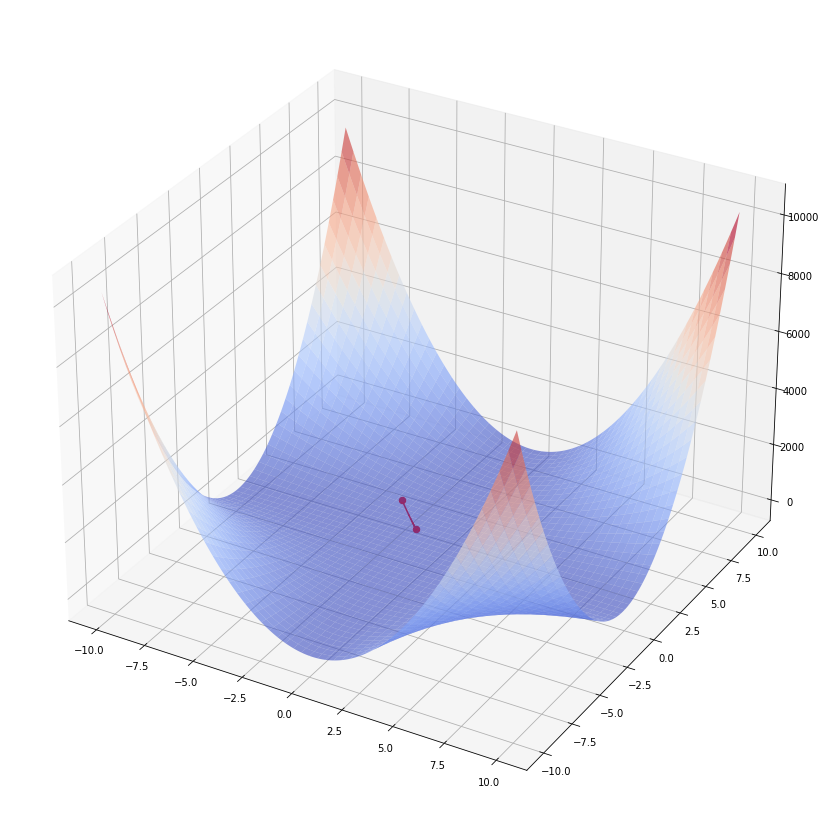

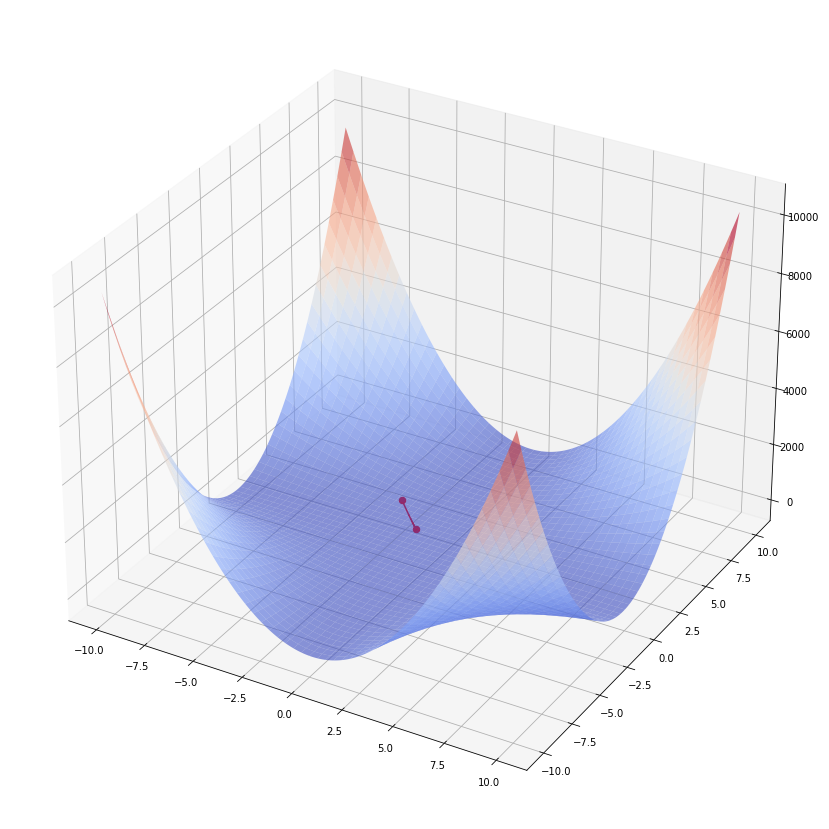

(48, 0.00020202020202020202)

In [97]:
startingPoint = np.array([random.randint(minValue, maxValue), random.randint(minValue, maxValue)])
found(startingPoint, function, TypeOfLearningRate.const)
found(startingPoint, function, TypeOfLearningRate.timeBased)

### Execution of GDS on function1 $\quad f(x, y) = x^2 + y^2$
First goes constant learning rate, then time based

GDS finished at: [-1.69253945e-08  1.59253950e-08] within 467 iterations
GDS finished at: [-0.08265716  0.08265716] within 397 iterations


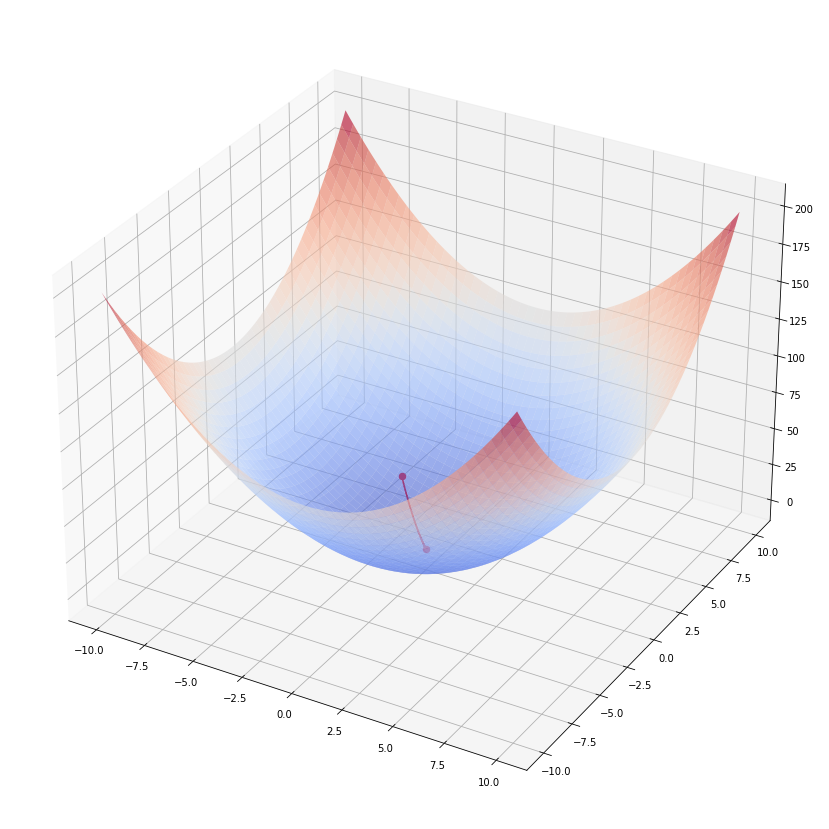

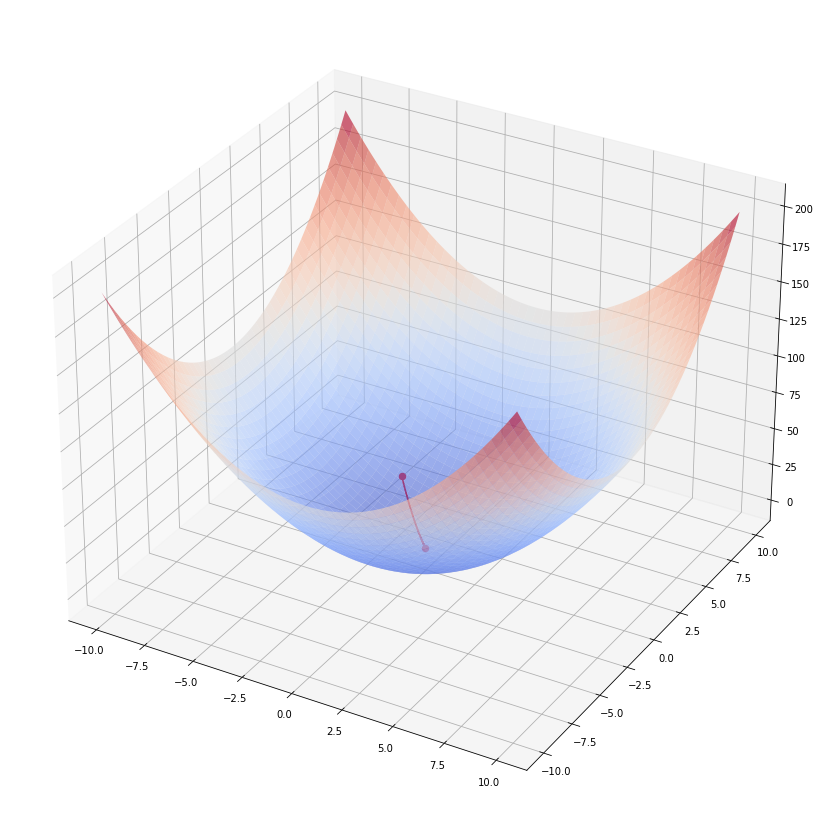

(50, 0.00020202020202020202)

In [98]:
found(startingPoint, function1, TypeOfLearningRate.const)
found(startingPoint, function1, TypeOfLearningRate.timeBased)

### Execution of GDS on function2 $\quad f(x, y) = x^2 + (y - x)^2$
First goes constant learning rate, then time based

GDS finished at: [3.22448717e-08 5.26003493e-08] within 1075 iterations
GDS finished at: [0.13133517 0.21301944] within 394 iterations


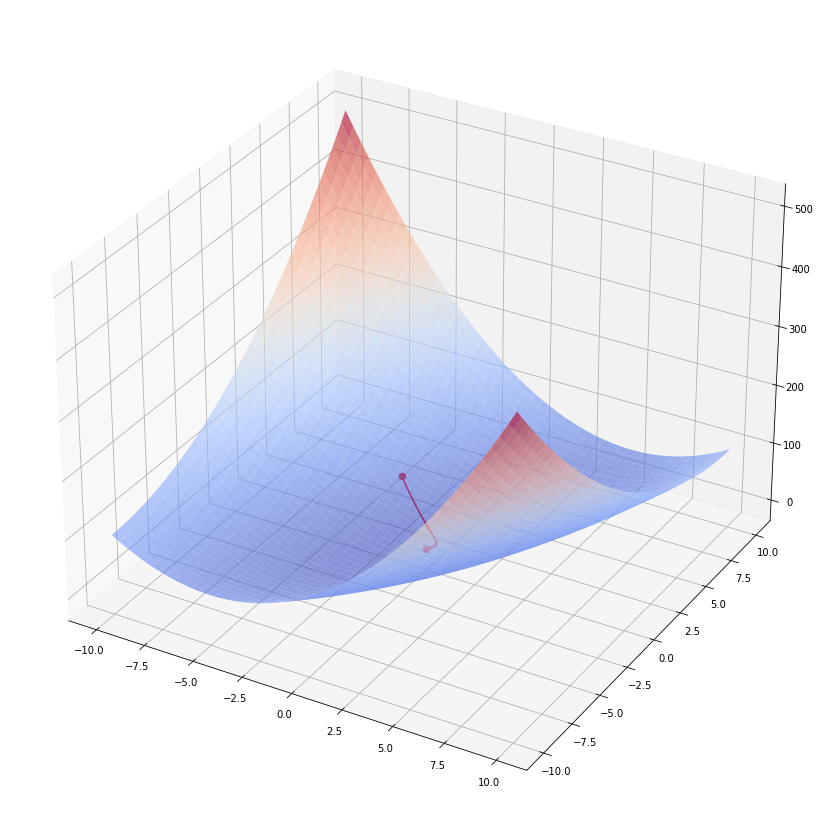

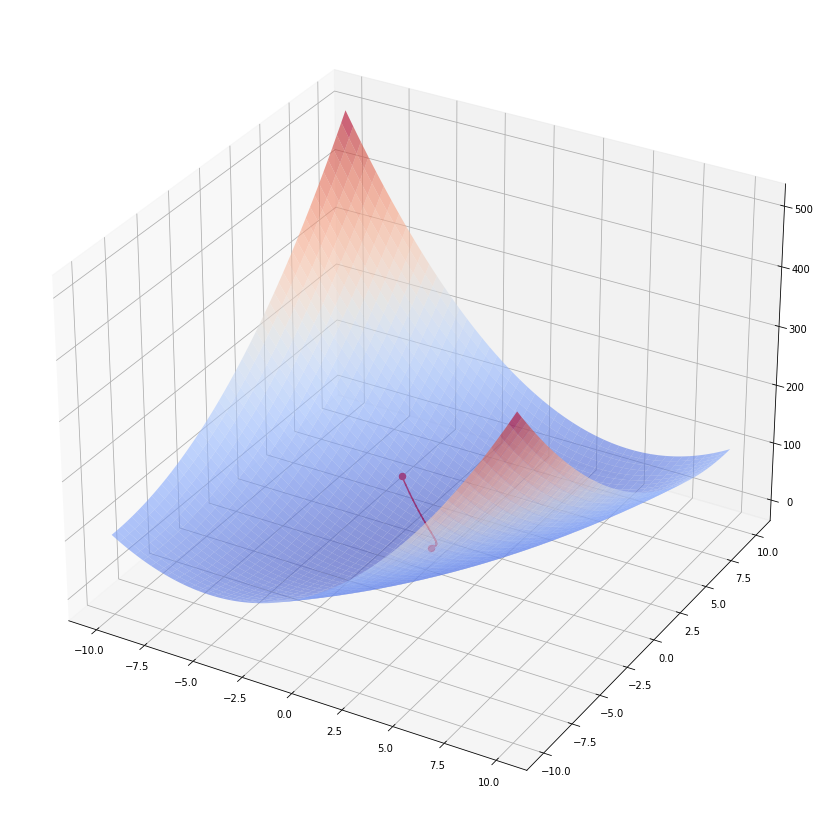

(50, 0.00020202020202020202)

In [99]:
found(startingPoint, function2, TypeOfLearningRate.const)
found(startingPoint, function2, TypeOfLearningRate.timeBased)

### Execution of GDS on function3 $\quad f(x, y) = x^2 + y^2 + xy$
First goes constant learning rate, then time based

GDS finished at: [-3.47461087e-08  3.40794420e-08] within 906 iterations
GDS finished at: [-0.50444542  0.50444542] within 411 iterations


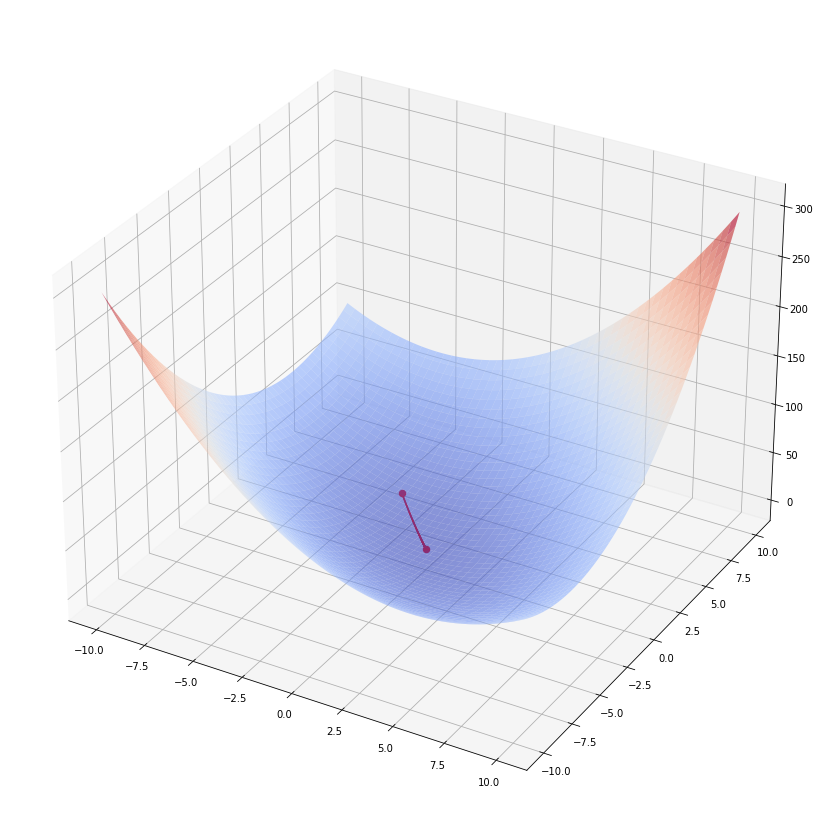

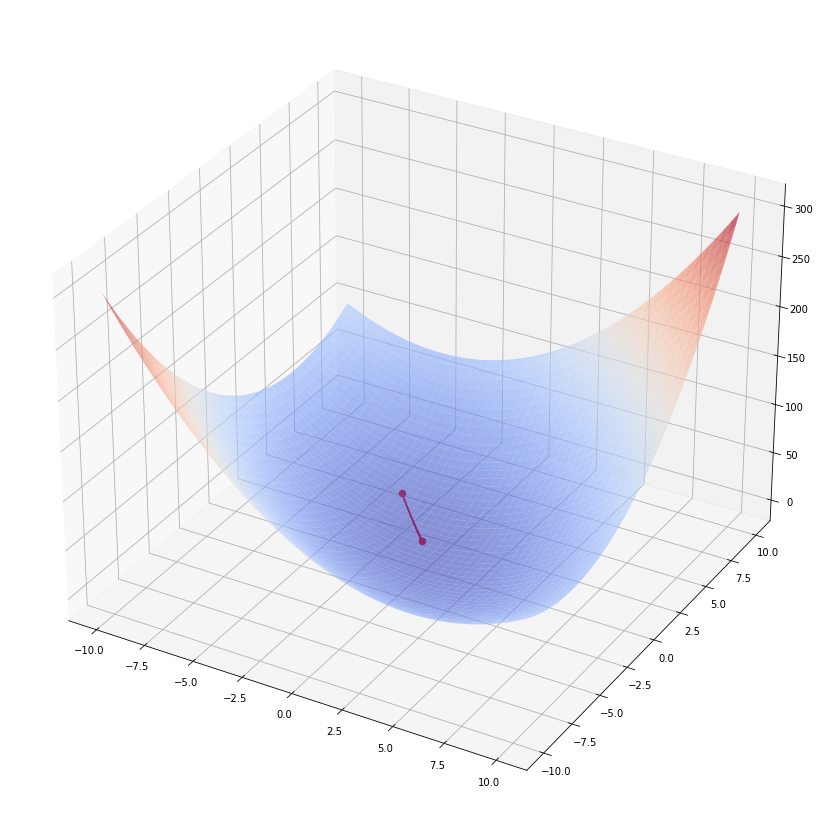

(49, 0.00020202020202020202)

In [100]:
found(startingPoint, function3, TypeOfLearningRate.const)
found(startingPoint, function3, TypeOfLearningRate.timeBased)

# Dichotomy and Wolfe condition (Task 3-4)
The main idea is to find new learning rate constant on every iteration using one-dimensional search
and using this alpha do the next iteration of GDS.

In [101]:
def dichotomy(a, b, startPoint, p, abstractFunction, condition):
    middle = (a + b) / 2
    if (condition == ConditionOfDichotomy.normal):
        if (abs(a - b) < eps):
            return middle
    else:
        if (wolfeConditions(abstractFunction, startPoint, middle, p)):
            return middle
    x1 = middle - delta
    x2 = middle + delta
    if (phi(startPoint, p, x1, abstractFunction) < phi(startPoint, p, x2, abstractFunction)):
        return dichotomy(a, x2, startPoint, p, abstractFunction, condition)
    elif (phi(startPoint, p, x1, abstractFunction) > phi(startPoint, p, x2, abstractFunction)):
        return dichotomy(x1, b, startPoint, p, abstractFunction, condition)
    else:
        return dichotomy(x1, x2, startPoint, p, abstractFunction, condition)

def findSegment(startPoint, abstractFunction, condition):
    phi0 = abstractFunction(startPoint[0], startPoint[1])
    p = gradient(startPoint[0], startPoint[1], abstractFunction)
    alpha = 0.0001
    phi1 = phi(startPoint, p, alpha, abstractFunction)
    if phi0 > phi1: 
        alpha *= 2
        phi2 = phi(startPoint, p, alpha, abstractFunction)
        while phi2 < phi1: 
            alpha *= 2
            phi2 = phi(startPoint, p, alpha, abstractFunction)
    res = dichotomy(0, alpha, startPoint, p, abstractFunction, condition)
    return startPoint - res * p
 
def gradientDescentDichotomy(startingPoint, abstractFunction, condition):
    descentPoints = []
    descentPoints.append(startingPoint)
    descentPoints.append(findSegment(startingPoint, abstractFunction, condition))
    ind = 1
    while not checkIfLessThanEps(descentPoints[ind - 1], descentPoints[ind]):
        segment = findSegment(descentPoints[ind], abstractFunction, condition)
        descentPoints.append(segment)
        ind += 1
    print("Gradient descent dichotomy finished at the point of: ", descentPoints[ind])
    print("Number of iterations: ", ind)
    getGraph(descentPoints, abstractFunction)

def wolfeConditions(abstractFunction, startPoint, alpha, p):
    point = startPoint - alpha * p
    return (abstractFunction(point[0], point[1]) <= abstractFunction(startPoint[0], startPoint[1]) + alpha * c1 * np.dot(p, -p)) \
           and (np.dot(gradient(point[0], point[1], abstractFunction), -p)) >= c2 * np.dot(p, -p)


### Execution of Dichotomy on function $\quad f(x, y) = x^2 y^2 + 3xy - 5$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [ 0.40356894 -3.71683655]
Number of iterations:  2
Gradient descent dichotomy finished at the point of:  [-6.61126485  0.22688549]
Number of iterations:  12


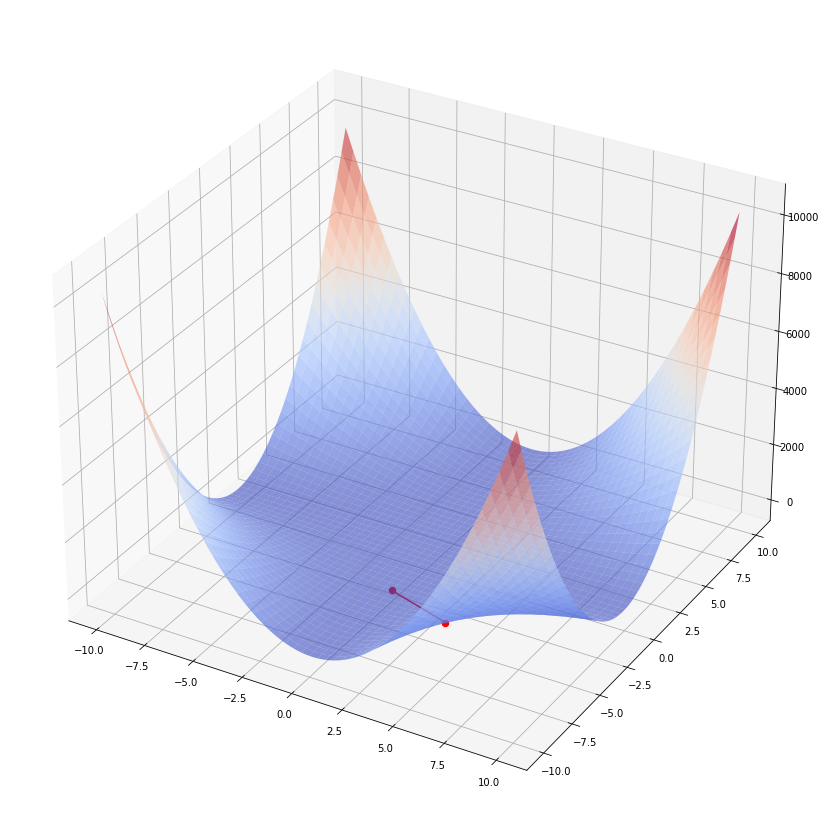

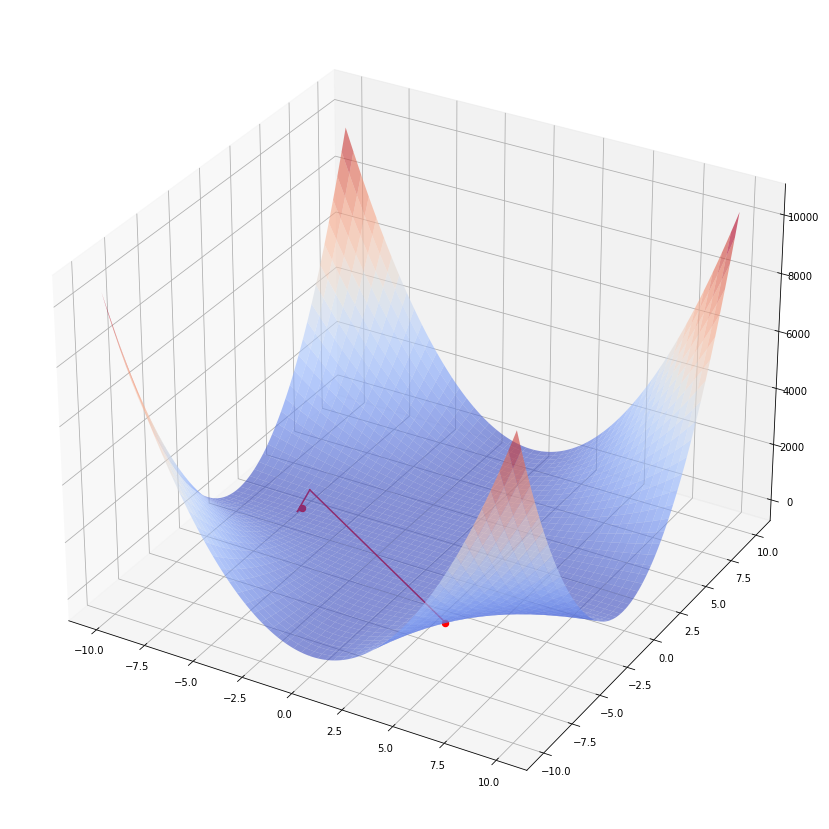

In [103]:
startingPoint = np.array([random.randint(minValue, maxValue), random.randint(minValue, maxValue)])
gradientDescentDichotomy(startingPoint, function, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function, ConditionOfDichotomy.wolfe)

### Execution of Dichotomy on function1 $\quad f(x, y) = x^2 + y^2$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [ 6.74501199e-11 -9.43548168e-11]
Number of iterations:  3
Gradient descent dichotomy finished at the point of:  [-6.03730514e-10 -3.54777781e-10]
Number of iterations:  52


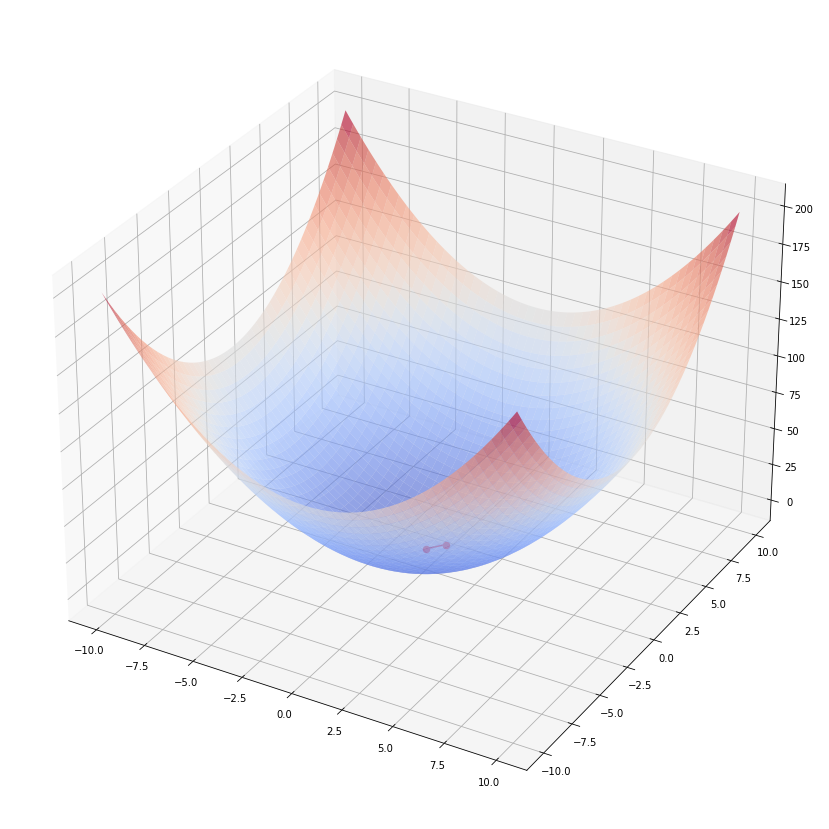

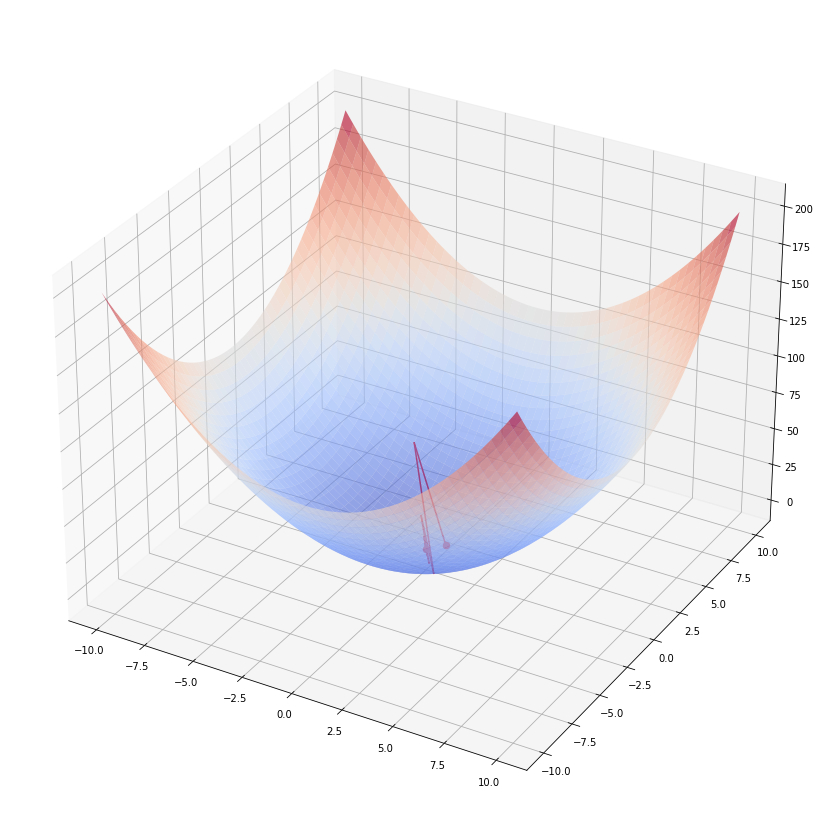

In [104]:
gradientDescentDichotomy(startingPoint, function1, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function1, ConditionOfDichotomy.wolfe)

### Execution of Dichotomy on function2 $\quad f(x, y) = x^2 + (y - x)^2$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [-1.76433193e-09 -2.56846176e-09]
Number of iterations:  14
Gradient descent dichotomy finished at the point of:  [-3.97835439e-10 -9.27665506e-10]
Number of iterations:  36


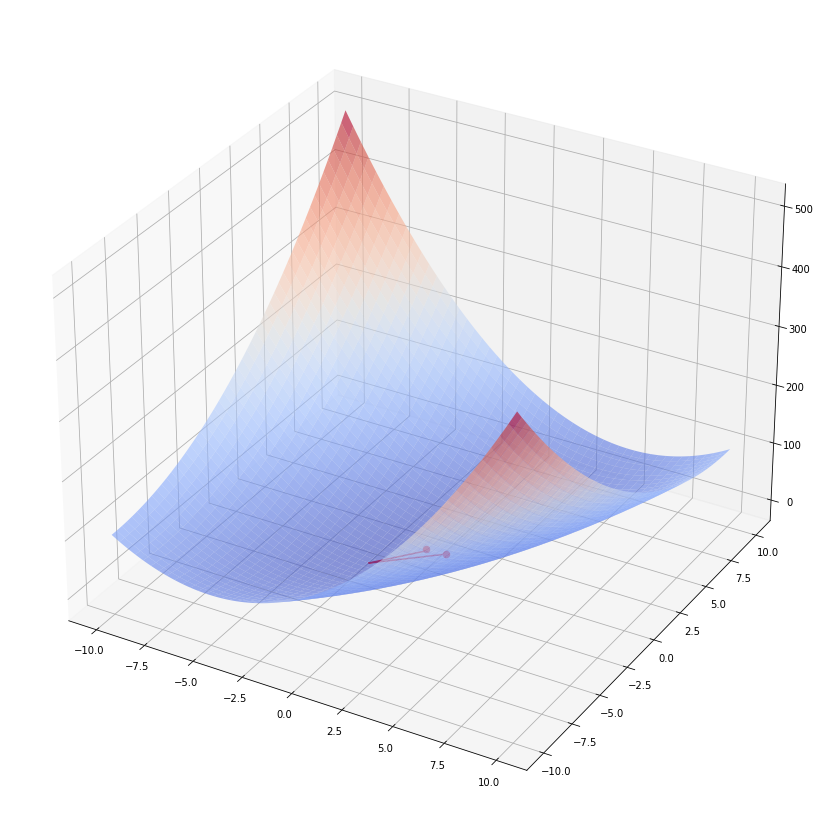

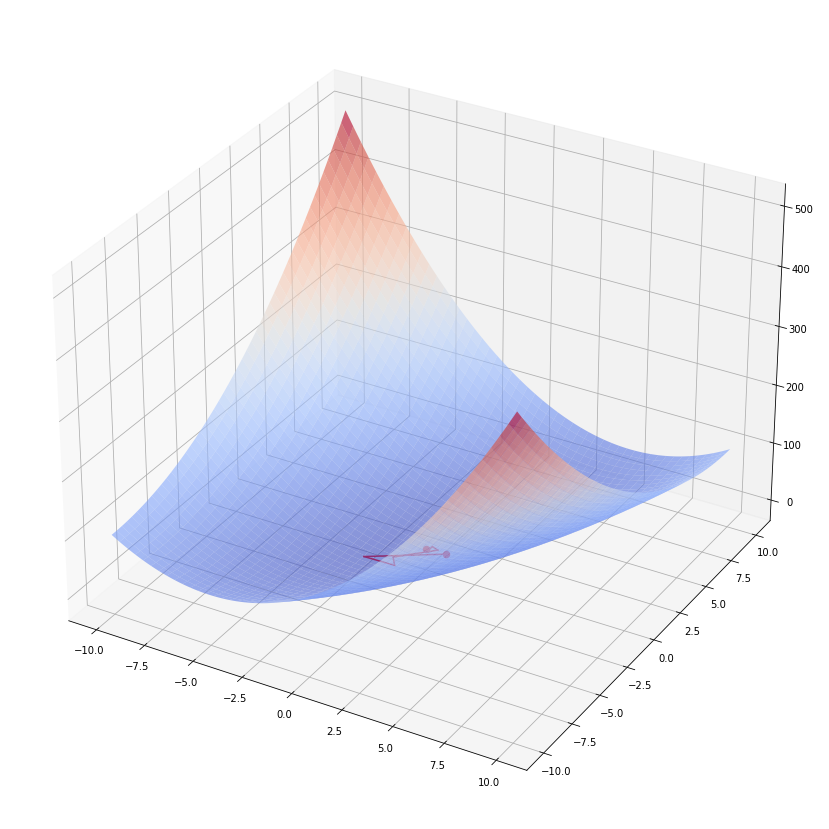

In [105]:
gradientDescentDichotomy(startingPoint, function2, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function2, ConditionOfDichotomy.wolfe)

### Execution of Dichotomy on function3 $\quad f(x, y) = x^2 + y^2 + xy$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [ 1.40493234e-10 -1.49587622e-10]
Number of iterations:  26
Gradient descent dichotomy finished at the point of:  [7.95587556e-11 2.78295045e-11]
Number of iterations:  28


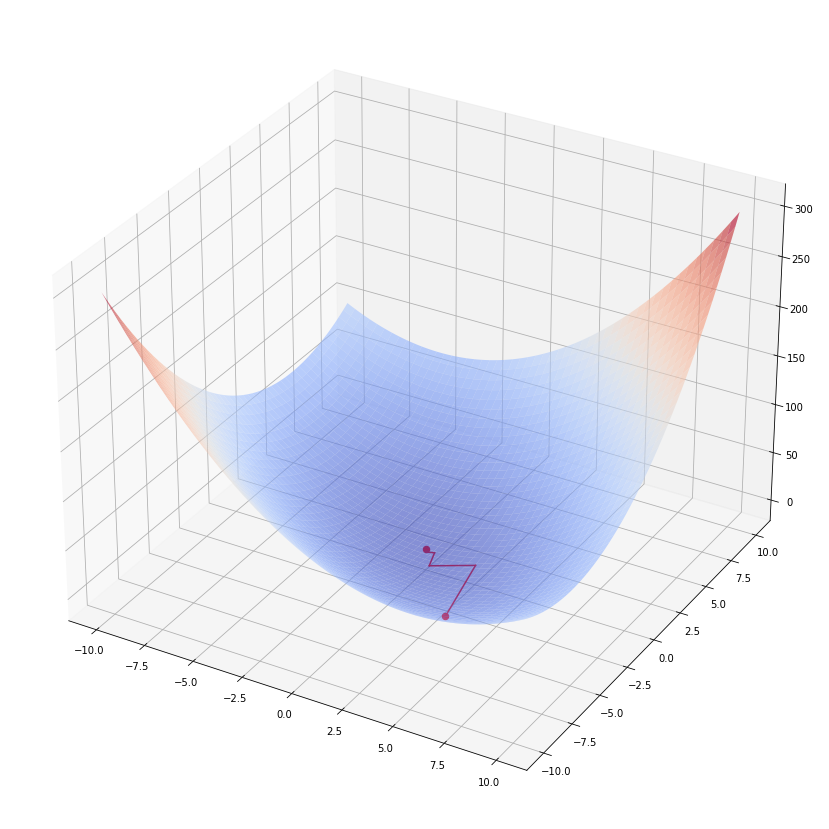

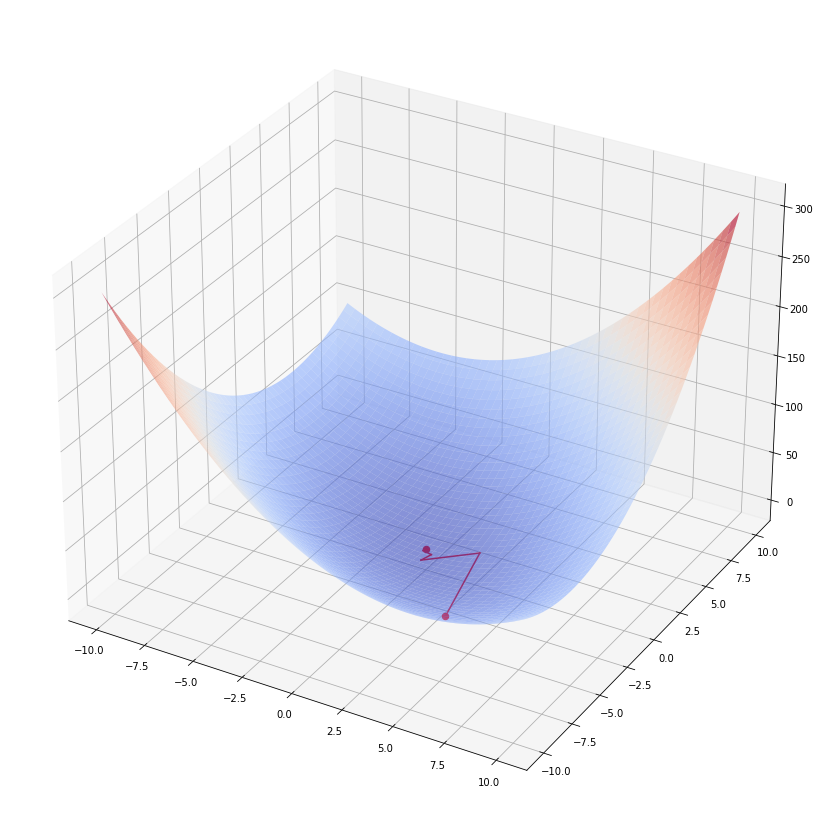

In [106]:
gradientDescentDichotomy(startingPoint, function3, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function3, ConditionOfDichotomy.wolfe)